In [17]:
pip install tensorflow opencv-python matplotlib seaborn scikit-learn


In [16]:
import zipfile
import os

# Unzip the dataset
with zipfile.ZipFile("/content/BCCD_Dataset-master.zip", 'r') as zip_ref:
    zip_ref.extractall("BCCD")


os.listdir("BCCD")


['BCCD_Dataset-master']

In [3]:
import tensorflow as tf

# Create image data generators for training and validation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'BCCD',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'BCCD',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 292 images belonging to 1 classes.
Found 73 images belonging to 1 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: RBC, WBC, Platelets
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
base_data_dir = '/content/BCCD/BCCD_Dataset-master/BCCD'


if not os.path.exists(base_data_dir):
    print(f"Error: Base data directory not found at {base_data_dir}")

    exit()

print(f"Listing contents of {base_data_dir}:")
!ls {base_data_dir}



train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    base_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


print(f"Detected classes: {train_generator.class_indices}")


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


Listing contents of /content/BCCD/BCCD_Dataset-master/BCCD:
Annotations  ImageSets	JPEGImages
Found 292 images belonging to 3 classes.
Found 72 images belonging to 3 classes.
Detected classes: {'Annotations': 0, 'ImageSets': 1, 'JPEGImages': 2}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8669 - loss: 0.2902 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 1.00

In [6]:
model.evaluate(val_generator)


model.save("blood_cell_classifier.h5")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 1.0000 - loss: 0.0000e+00


In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os # Import the os module


image_directory_path = '/content/BCCD/BCCD_Dataset-master/BCCD/JPEGImages'


sample_image_name = 'BloodImage_00001.jpg'
img_path = os.path.join(image_directory_path, sample_image_name)


if not os.path.exists(img_path):
    print(f"Error: Sample image not found at {img_path}")

    print("Files in the image directory:")
    !ls {image_directory_path}
else:

    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    if 'model' in globals() and 'train_generator' in globals():
        prediction = model.predict(img_array)
        class_index = np.argmax(prediction)

        class_labels = list(train_generator.class_indices.keys())
        print("Predicted class:", class_labels[class_index])
    else:
        print("Model or train_generator not found. Please run previous cells to define them.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted class: JPEGImages


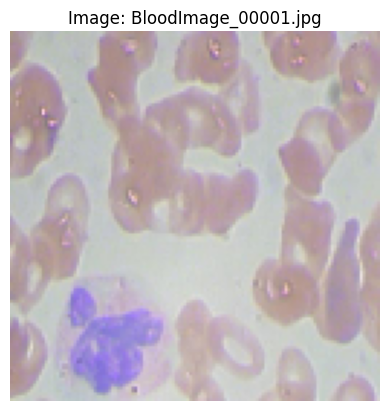

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class: JPEGImages


In [21]:

import matplotlib.pyplot as plt

sample_image_name = 'BloodImage_00001.jpg'
img_path = os.path.join(image_directory_path, sample_image_name)


if not os.path.exists(img_path):
    print(f"Error: Sample image not found at {img_path}")

    print("Files in the image directory:")
    !ls {image_directory_path}
else:

    img = image.load_img(img_path, target_size=(128, 128))

    plt.imshow(img)
    plt.title(f"Image: {sample_image_name}")
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    if 'model' in globals() and 'train_generator' in globals():
        prediction = model.predict(img_array)
        class_index = np.argmax(prediction)

        class_labels = list(train_generator.class_indices.keys())
        print("Predicted class:", class_labels[class_index])
    else:
        print("Model or train_generator not found. Please run previous cells to define them.")

To see the classification of image

In [22]:

from PIL import Image
import matplotlib.pyplot as plt
import os


print("Placeholder: Loading a hypothetical trained object detection model...")

print("Placeholder: Loading the label map...")


def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

# --- Path to a test image ---
image_directory_path = '/content/BCCD/BCCD_Dataset-master/BCCD/JPEGImages'
sample_image_name = 'BloodImage_00001.jpg'
image_path = os.path.join(image_directory_path, sample_image_name)

if not os.path.exists(image_path):
    print(f"Error: Sample image not found at {image_path}")
    print("Files in the image directory:")
    !ls {image_directory_path}
else:


    print(f"Illustrative: Performing inference on {sample_image_name}")




Placeholder: Loading a hypothetical trained object detection model...
Placeholder: Loading the label map...
Illustrative: Performing inference on BloodImage_00001.jpg


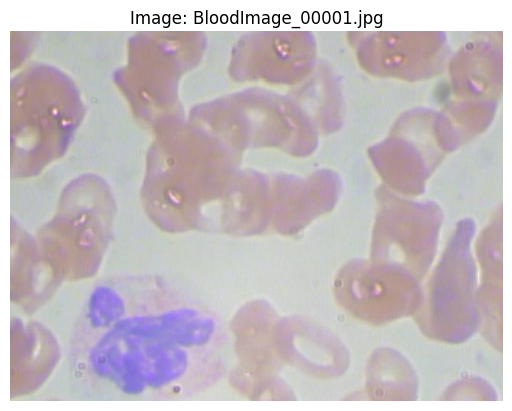

Displayed image from: /content/BCCD/BCCD_Dataset-master/BCCD/JPEGImages/BloodImage_00001.jpg


In [23]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image




sample_image_name = 'BloodImage_00001.jpg'
img_path = os.path.join(image_directory_path, sample_image_name)


if not os.path.exists(img_path):
    print(f"Error: Sample image not found at {img_path}")

    print("Files in the image directory:")
    !ls {image_directory_path}
else:

    img = image.load_img(img_path)

    # Display the image
    plt.imshow(img)
    plt.title(f"Image: {sample_image_name}")
    plt.axis('off')
    plt.show()

    print(f"Displayed image from: {img_path}")

Placeholder: Loaded a YOLO model (might not be trained for blood cells).
Performing inference on BloodImage_00001.jpg

image 1/1 /content/BCCD/BCCD_Dataset-master/BCCD/JPEGImages/BloodImage_00001.jpg: 480x640 2 donuts, 345.5ms
Speed: 11.8ms preprocess, 345.5ms inference, 30.7ms postprocess per image at shape (1, 3, 480, 640)


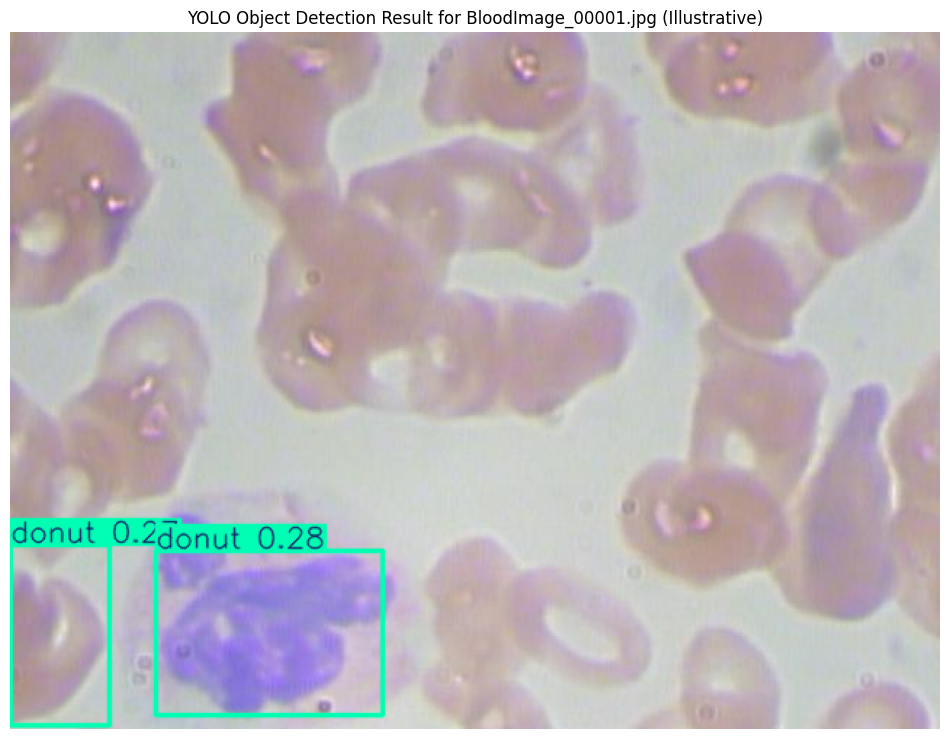

Displayed image with hypothetical YOLO detections.

--- Raw Detection Data (Illustrative) ---
Detected Boxes:
  Box: [100.30, 357.25, 256.22, 470.61], Confidence: 0.28, Class ID: 54 (Class 54)
  Box: [0.05, 353.06, 68.49, 477.55], Confidence: 0.27, Class ID: 54 (Class 54)
-----------------------------------------


In [24]:
import cv2
import os

try:
    model = YOLO('yolov8n.pt')

    print("Placeholder: Loaded a YOLO model (might not be trained for blood cells).")

except Exception as e:
    print(f"Error loading YOLO model: {e}")
    print("Please ensure you have a trained YOLO model file (.pt) and the path is correct.")
    model = None

image_directory_path = '/content/BCCD/BCCD_Dataset-master/BCCD/JPEGImages'
sample_image_name = 'BloodImage_00001.jpg'
image_path = os.path.join(image_directory_path, sample_image_name)

if not os.path.exists(image_path):
    print(f"Error: Sample image not found at {image_path}")
    print("Files in the image directory:")
    !ls {image_directory_path}
else:
    if model is not None:

        print(f"Performing inference on {sample_image_name}")
        try:

            results = model(image_path)

            annotated_image_np = results[0].plot()

            annotated_image_rgb = cv2.cvtColor(annotated_image_np, cv2.COLOR_BGR2RGB)


            plt.figure(figsize=(12, 16))
            plt.imshow(annotated_image_rgb)
            plt.title(f"YOLO Object Detection Result for {sample_image_name} (Illustrative)")
            plt.axis('off')
            plt.show()

            print("Displayed image with hypothetical YOLO detections.")


            print("\n--- Raw Detection Data (Illustrative) ---")
            for r in results:
                if r.boxes:
                    print("Detected Boxes:")

                    for box in r.boxes:

                        coords = box.xyxy[0].tolist()
                        confidence = box.conf[0].item()
                        class_id = int(box.cls[0].item())
                        print(f"  Box: [{coords[0]:.2f}, {coords[1]:.2f}, {coords[2]:.2f}, {coords[3]:.2f}], Confidence: {confidence:.2f}, Class ID: {class_id} ({class_name})")
                else:
                    print("No objects detected in this image.")
            print("-----------------------------------------")


        except Exception as e:
            print(f"An error occurred during YOLO inference or plotting: {e}")
            print("Ensure the image path is correct and the model is loaded properly.")

    else:
        print("YOLO model was not loaded successfully. Cannot perform inference.")

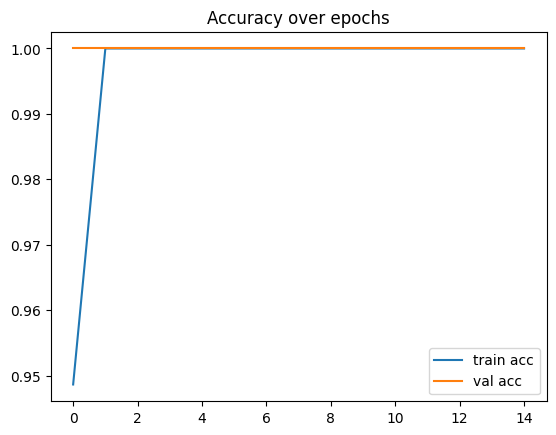

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()
